In [52]:
import pandas as pd
import pandas

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
dataset=pd.read_csv('data.csv')

In [55]:
dataset=pd.read_csv('data.csv')

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
data=pd.read_csv('data.csv')

In [58]:
dataset=pd.read_csv('data.csv')

In [59]:
for col in dataset:
    print (type(dataset[col][1]))


<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [60]:
dataset.head()

,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [61]:
dataset['timestamp']

0       28-02-2018 21:00
1       28-02-2018 21:15
2       28-02-2018 10:15
3       28-02-2018 10:15
4       28-02-2018 10:30
              ...       
2085       7/3/2018 3:50
2086      7/3/2018 21:10
2087      7/3/2018 12:10
2088      7/3/2018 10:35
2089      7/3/2018 23:45
Name: timestamp, Length: 2090, dtype: object

In [62]:

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')


In [63]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [64]:
dataset['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
               ...        
2085                   NaT
2086                   NaT
2087                   NaT
2088                   NaT
2089                   NaT
Name: timestamp, Length: 2090, dtype: datetime64[ns]

In [65]:
column_1 = dataset.iloc[:, 0]  # Assuming you want the first column

db = pd.DataFrame({
    "year": column_1.dt.year,
    "month": column_1.dt.month,
    "day": column_1.dt.day,
    "hour": column_1.dt.hour,
    "dayofyear": column_1.dt.day_of_year,
    "week": column_1.dt.isocalendar().week,
    "weekofyear": column_1.dt.isocalendar().week,
    "dayofweek": column_1.dt.day_of_week,
    "weekday": column_1.dt.weekday,
    "quarter": column_1.dt.quarter,
})


In [66]:
data1=pd.concat([db,dataset],axis=1)

In [67]:
data1.dropna(inplace=True)

#DATA ANALYSIS


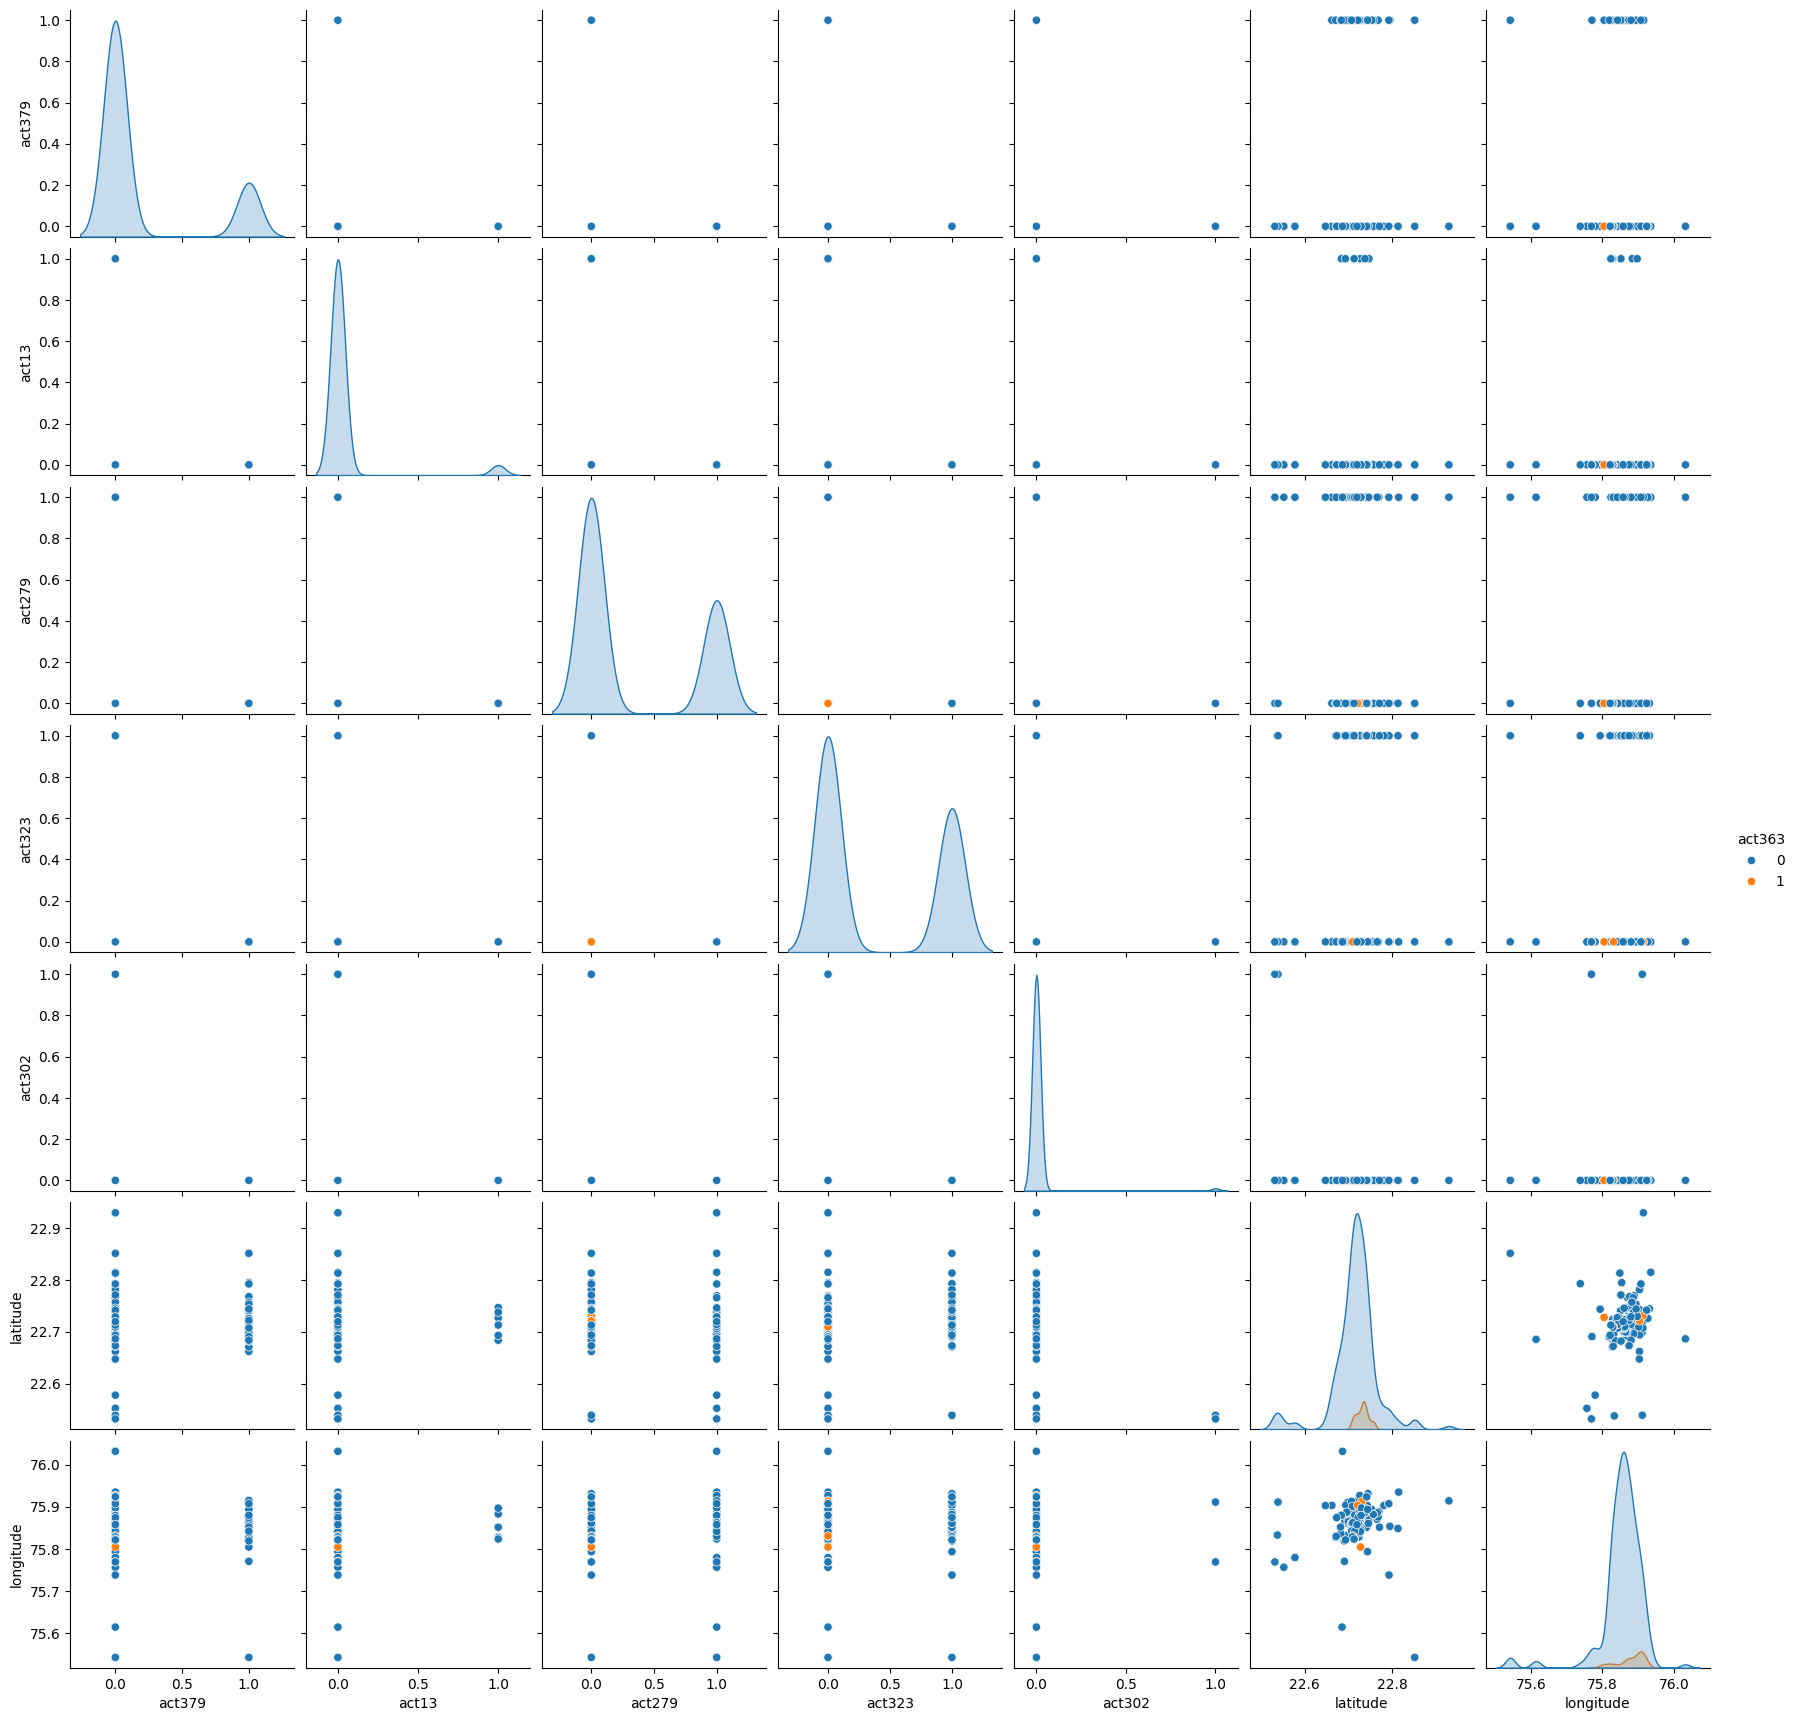

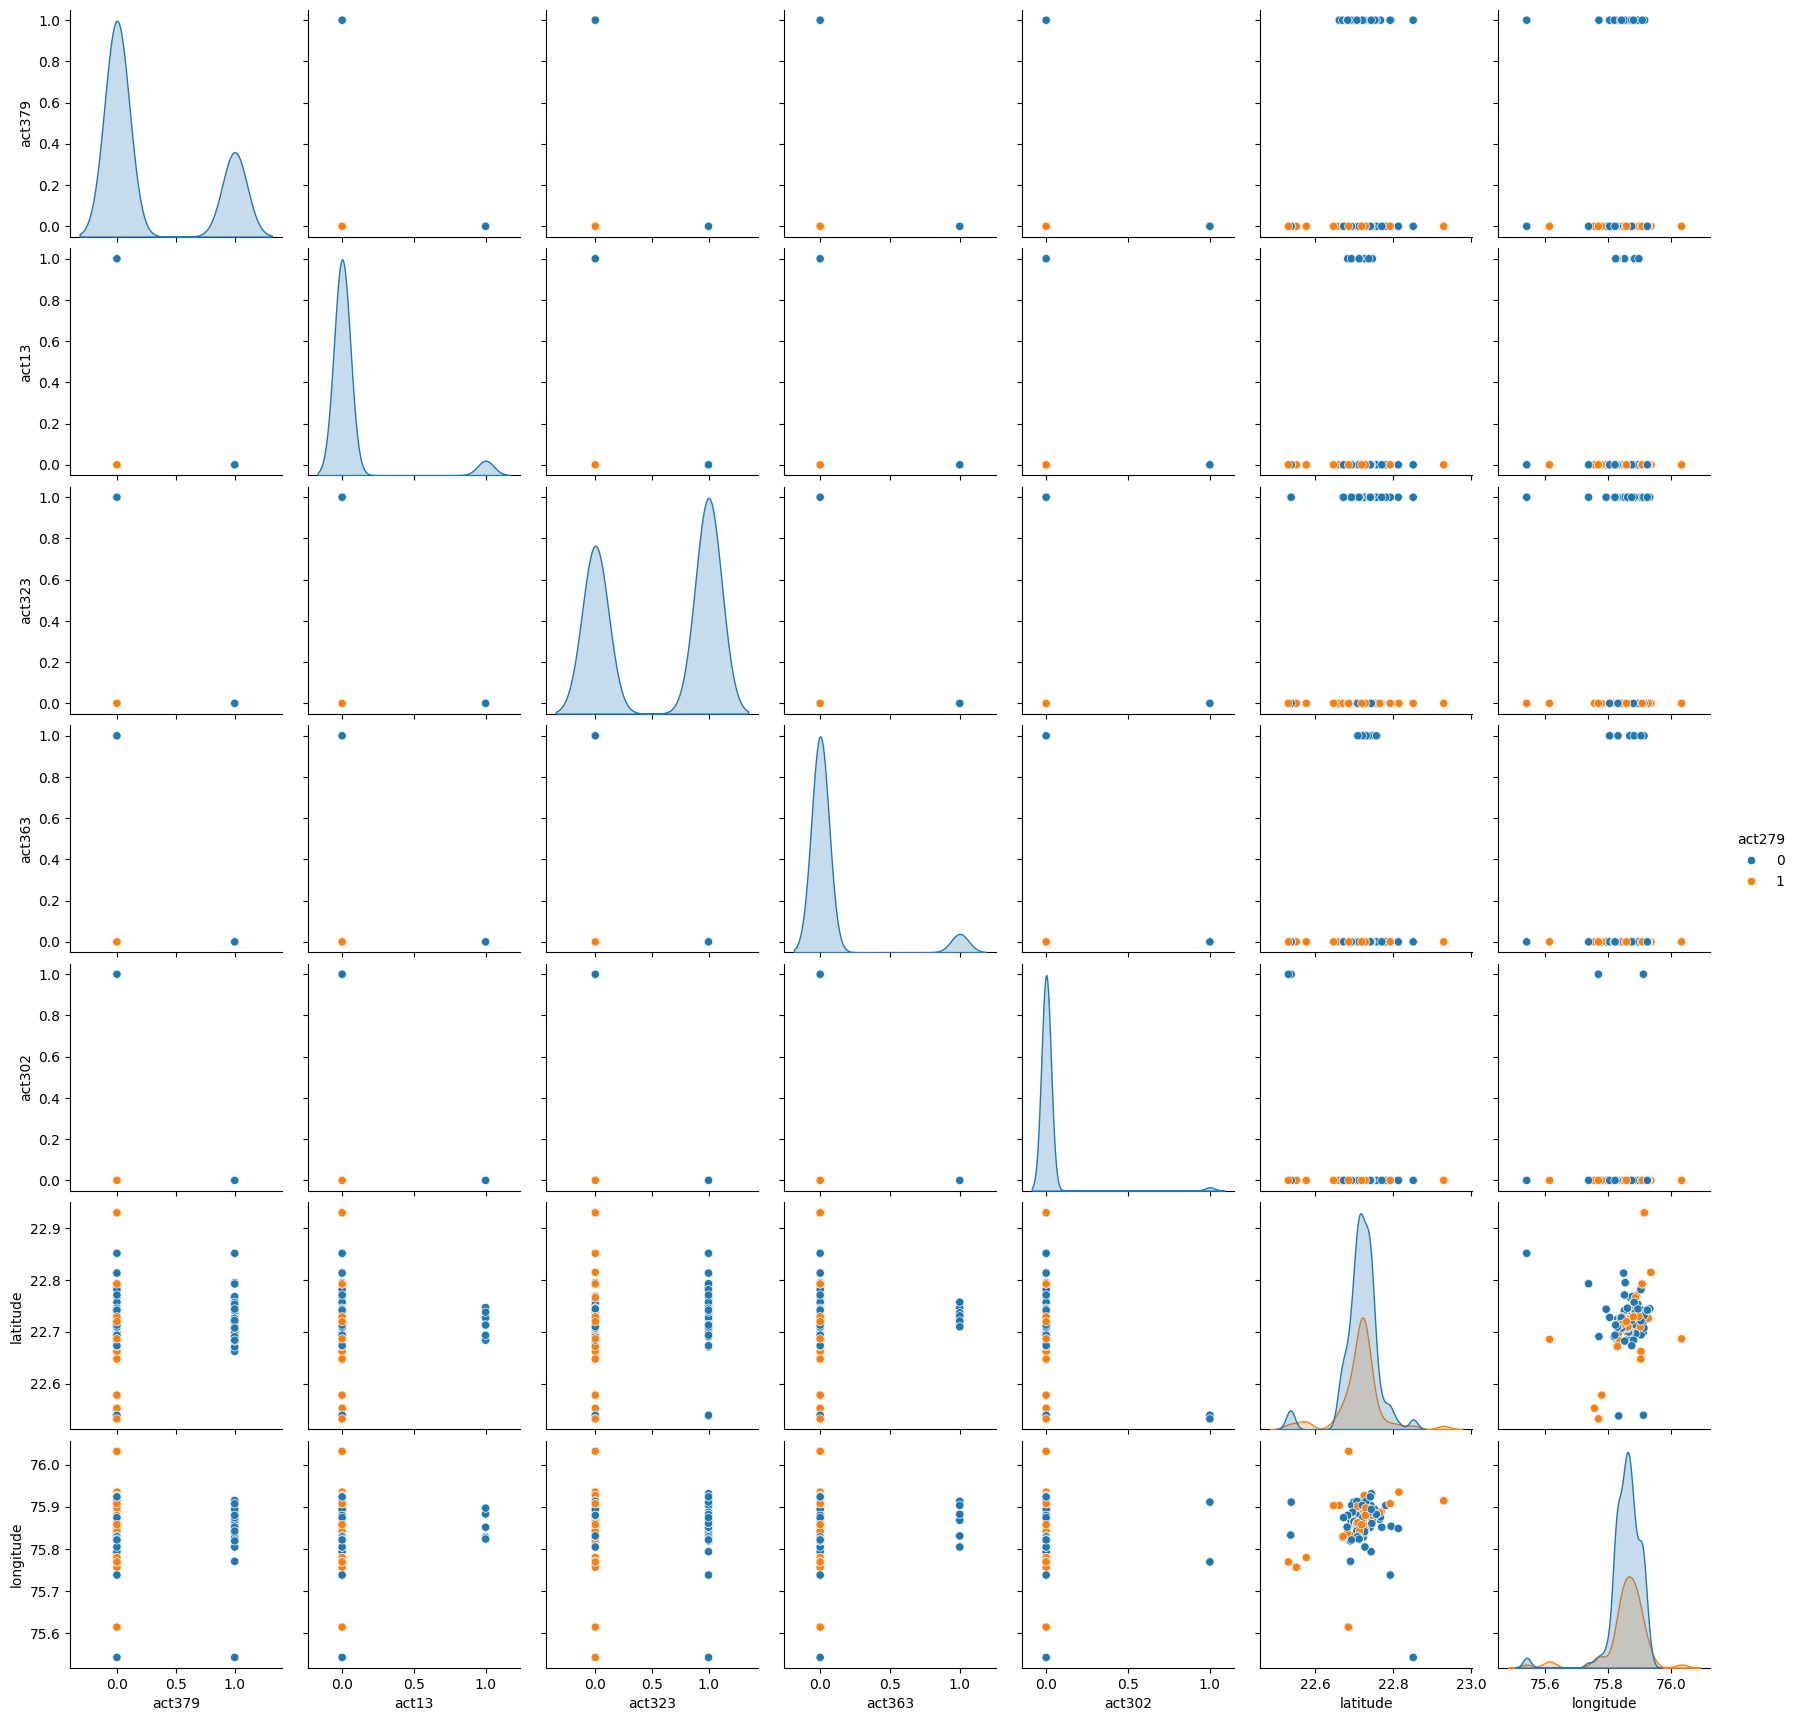

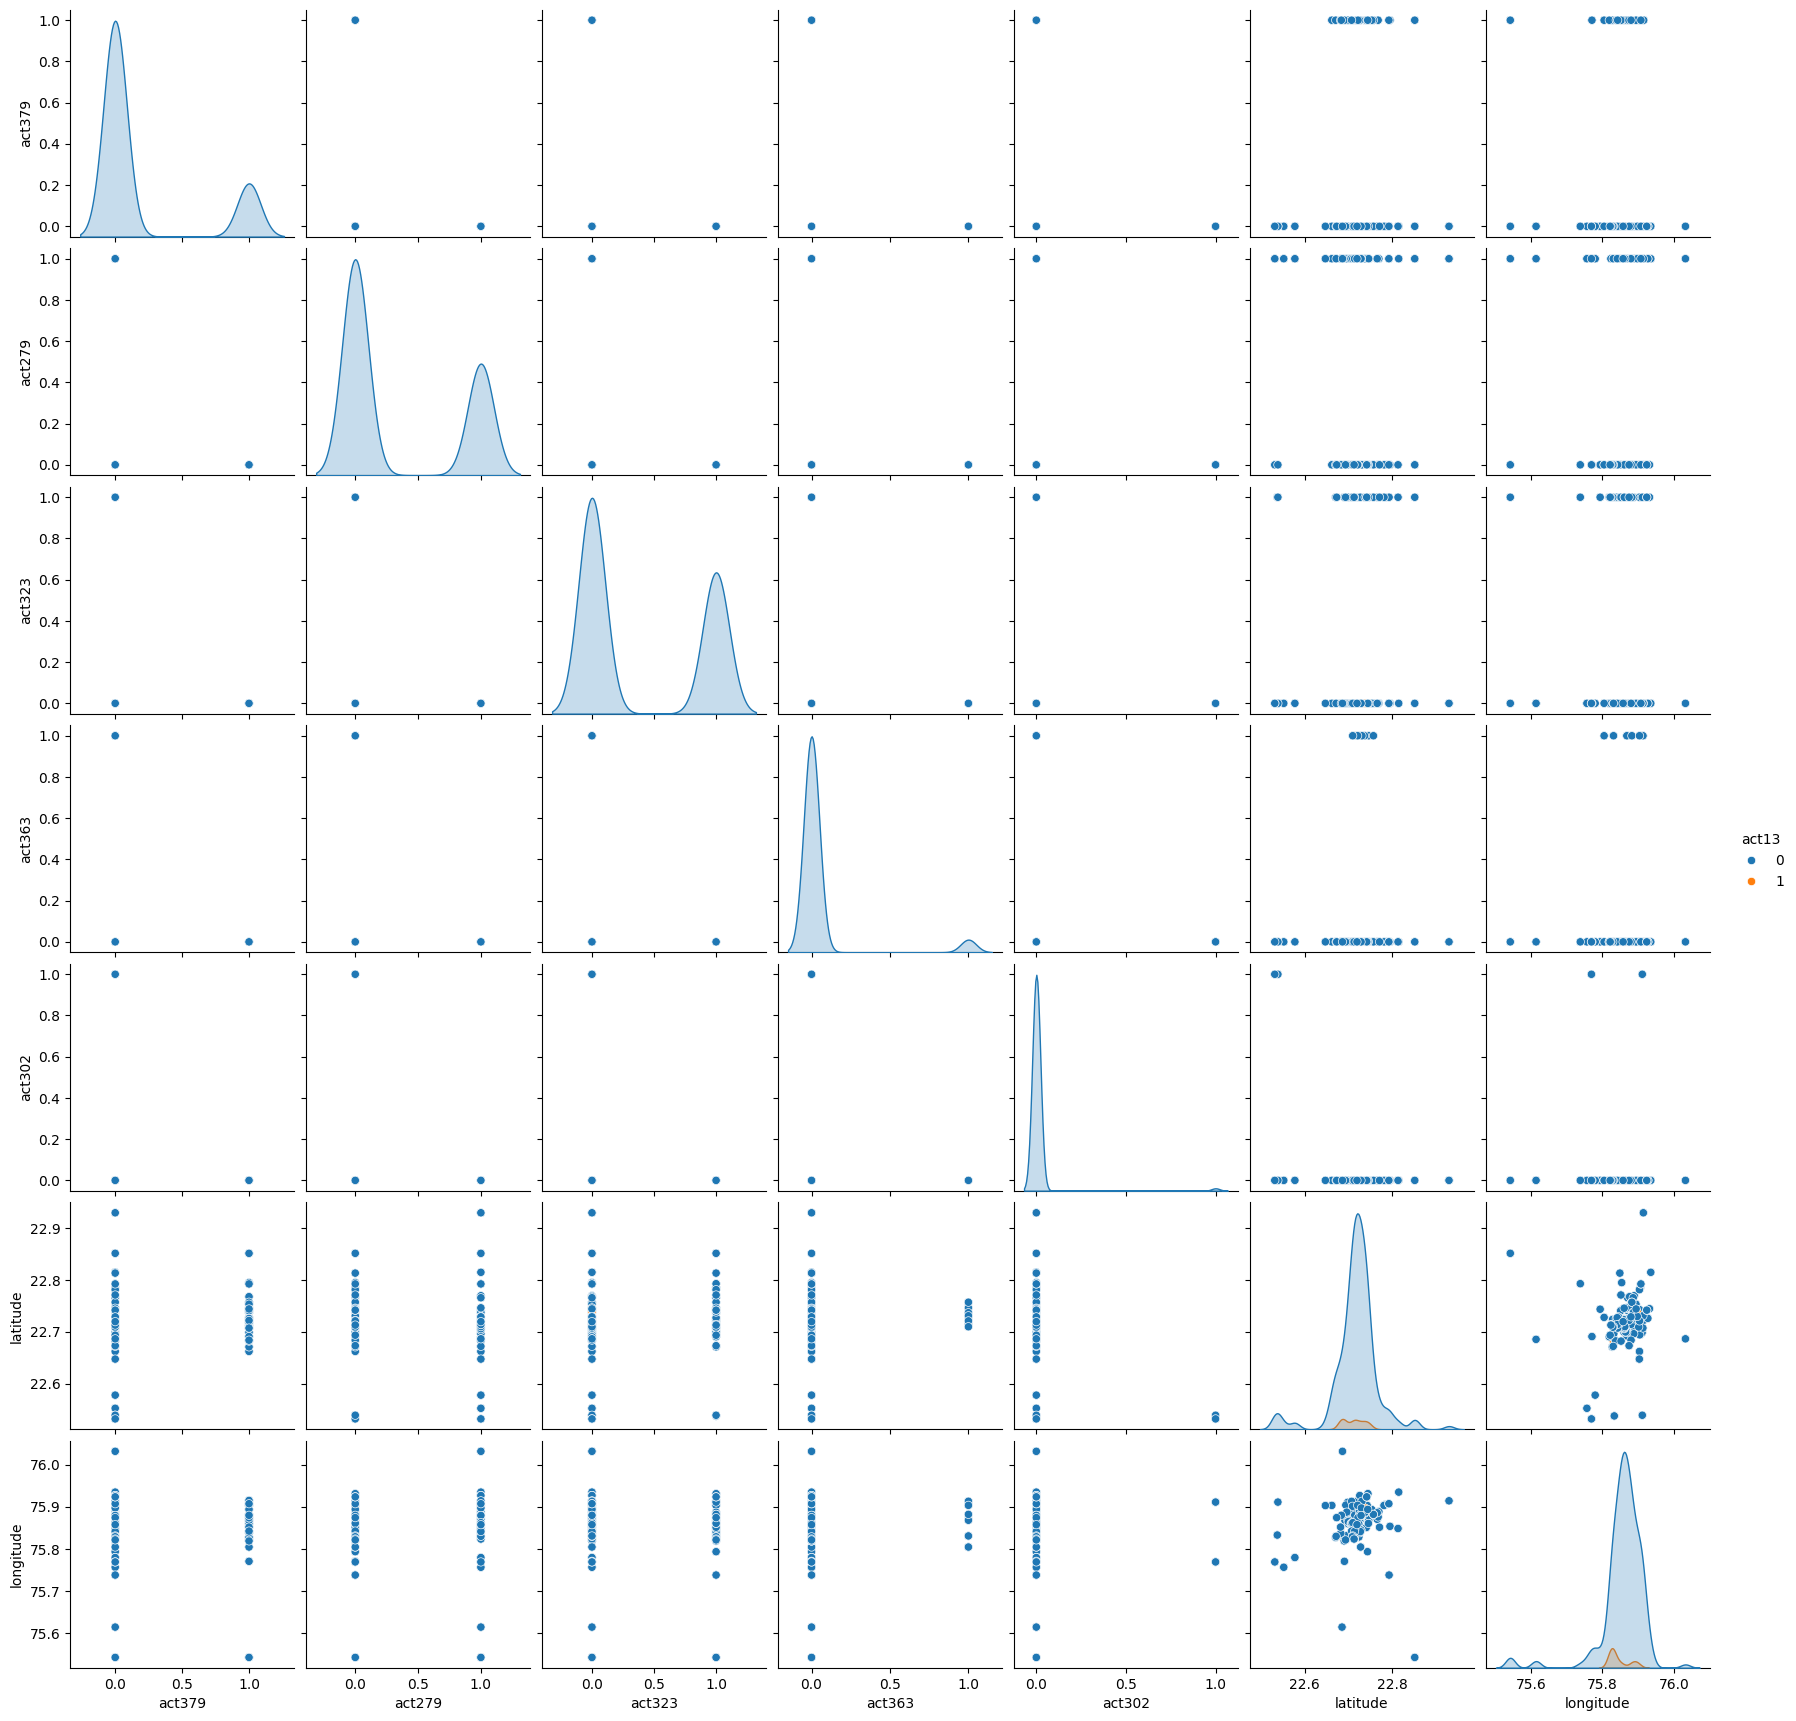

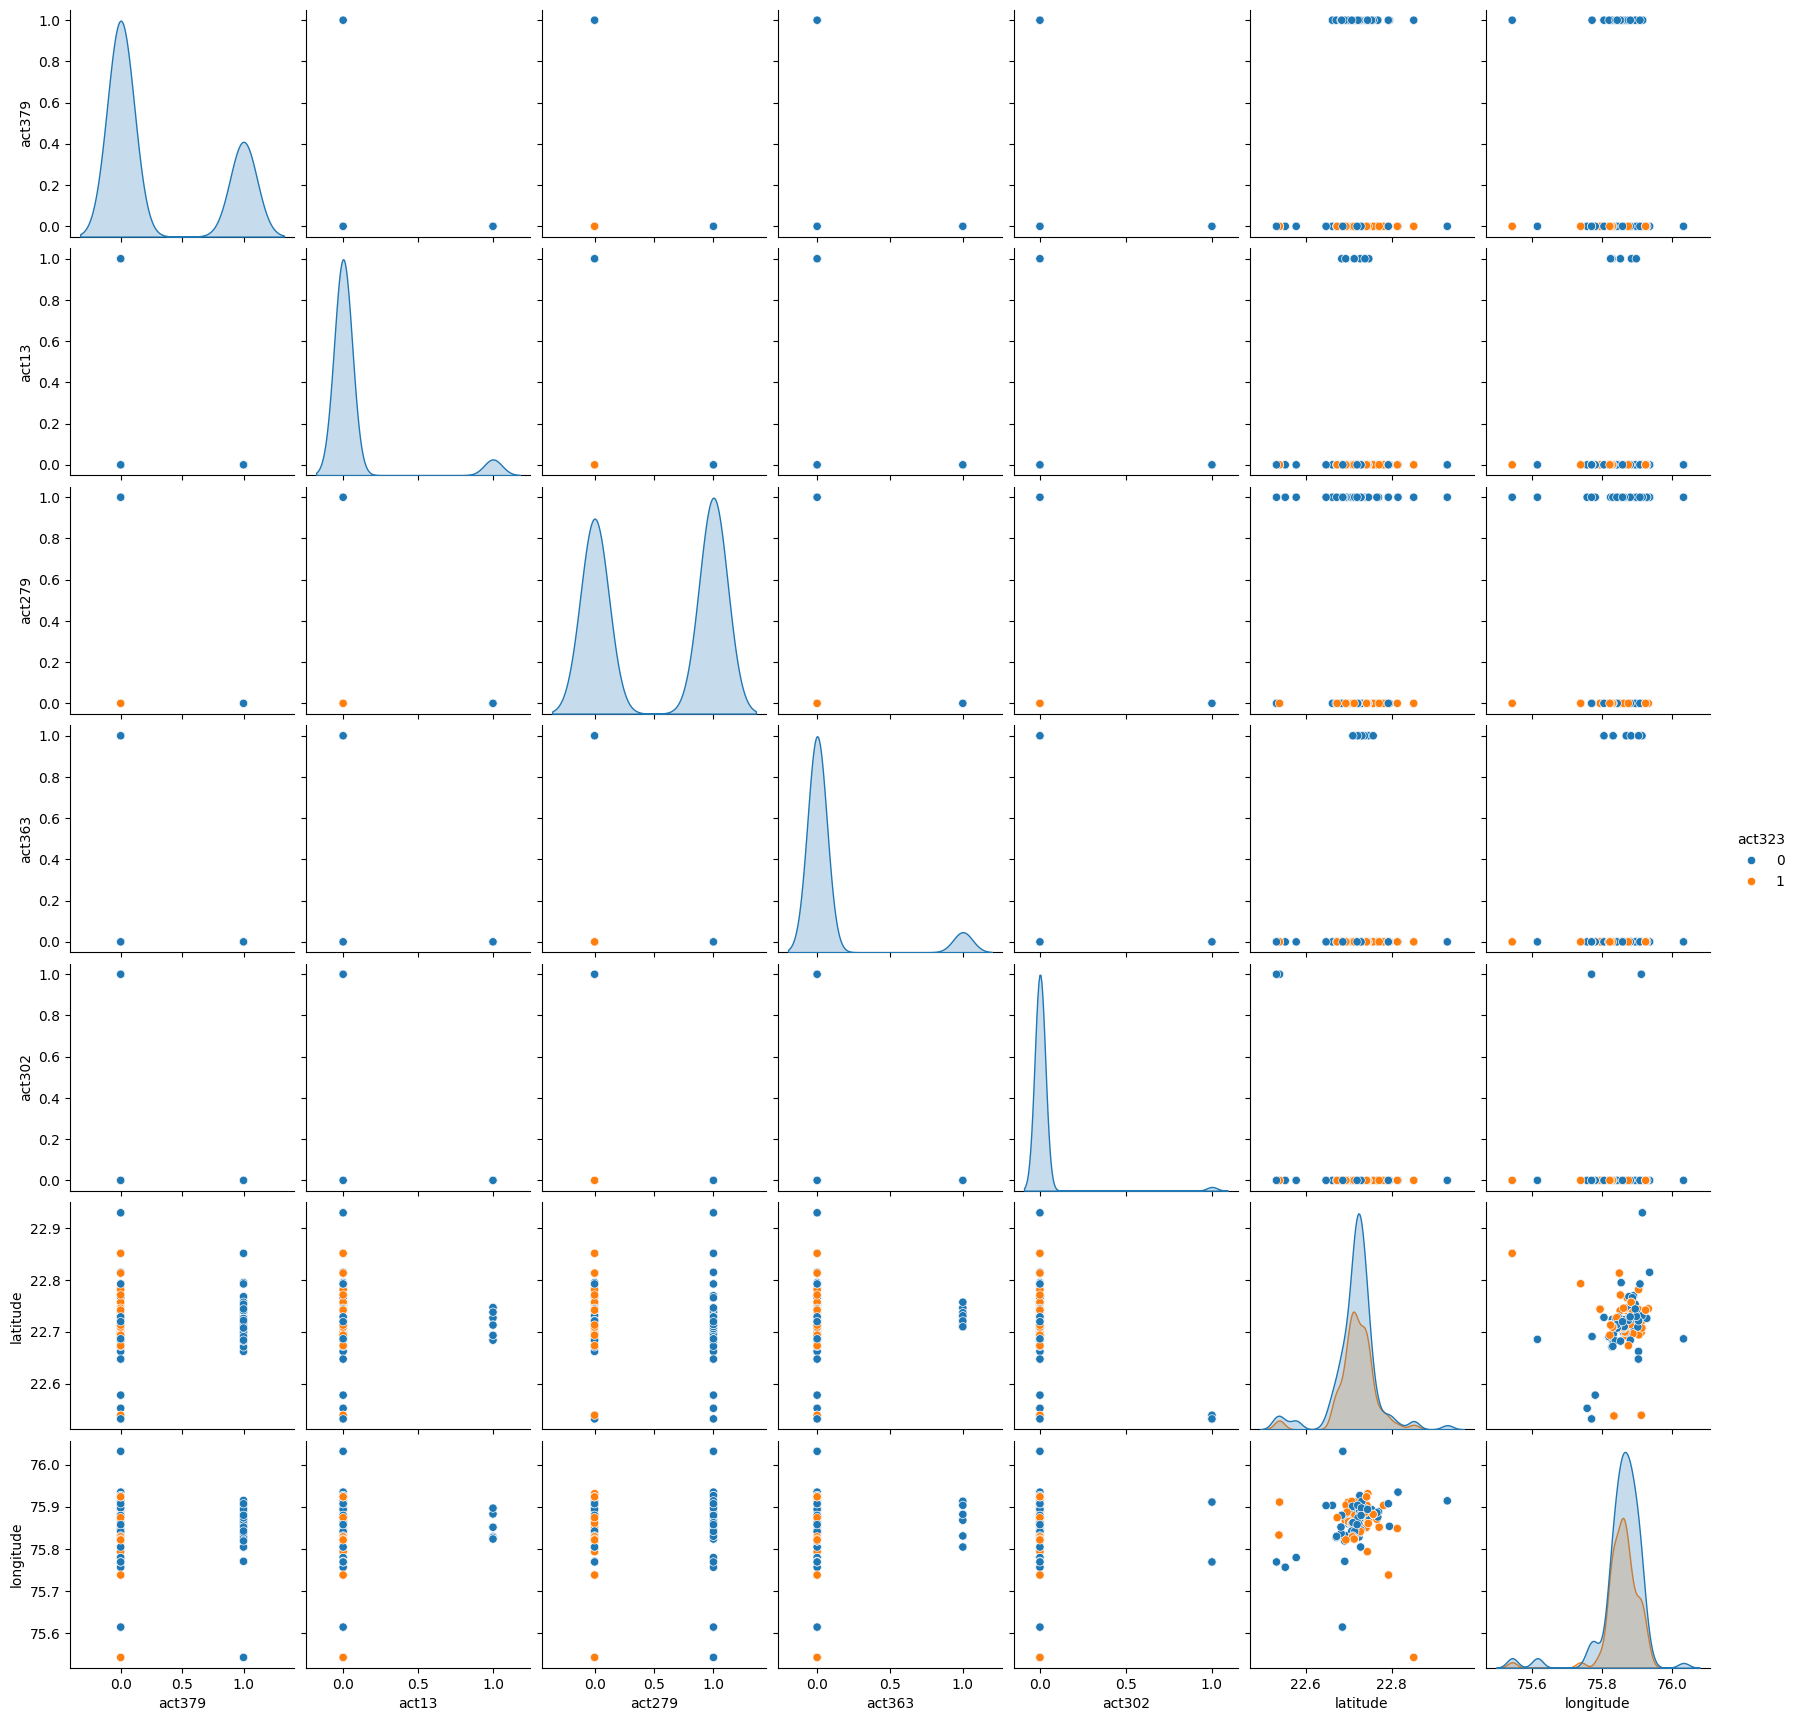

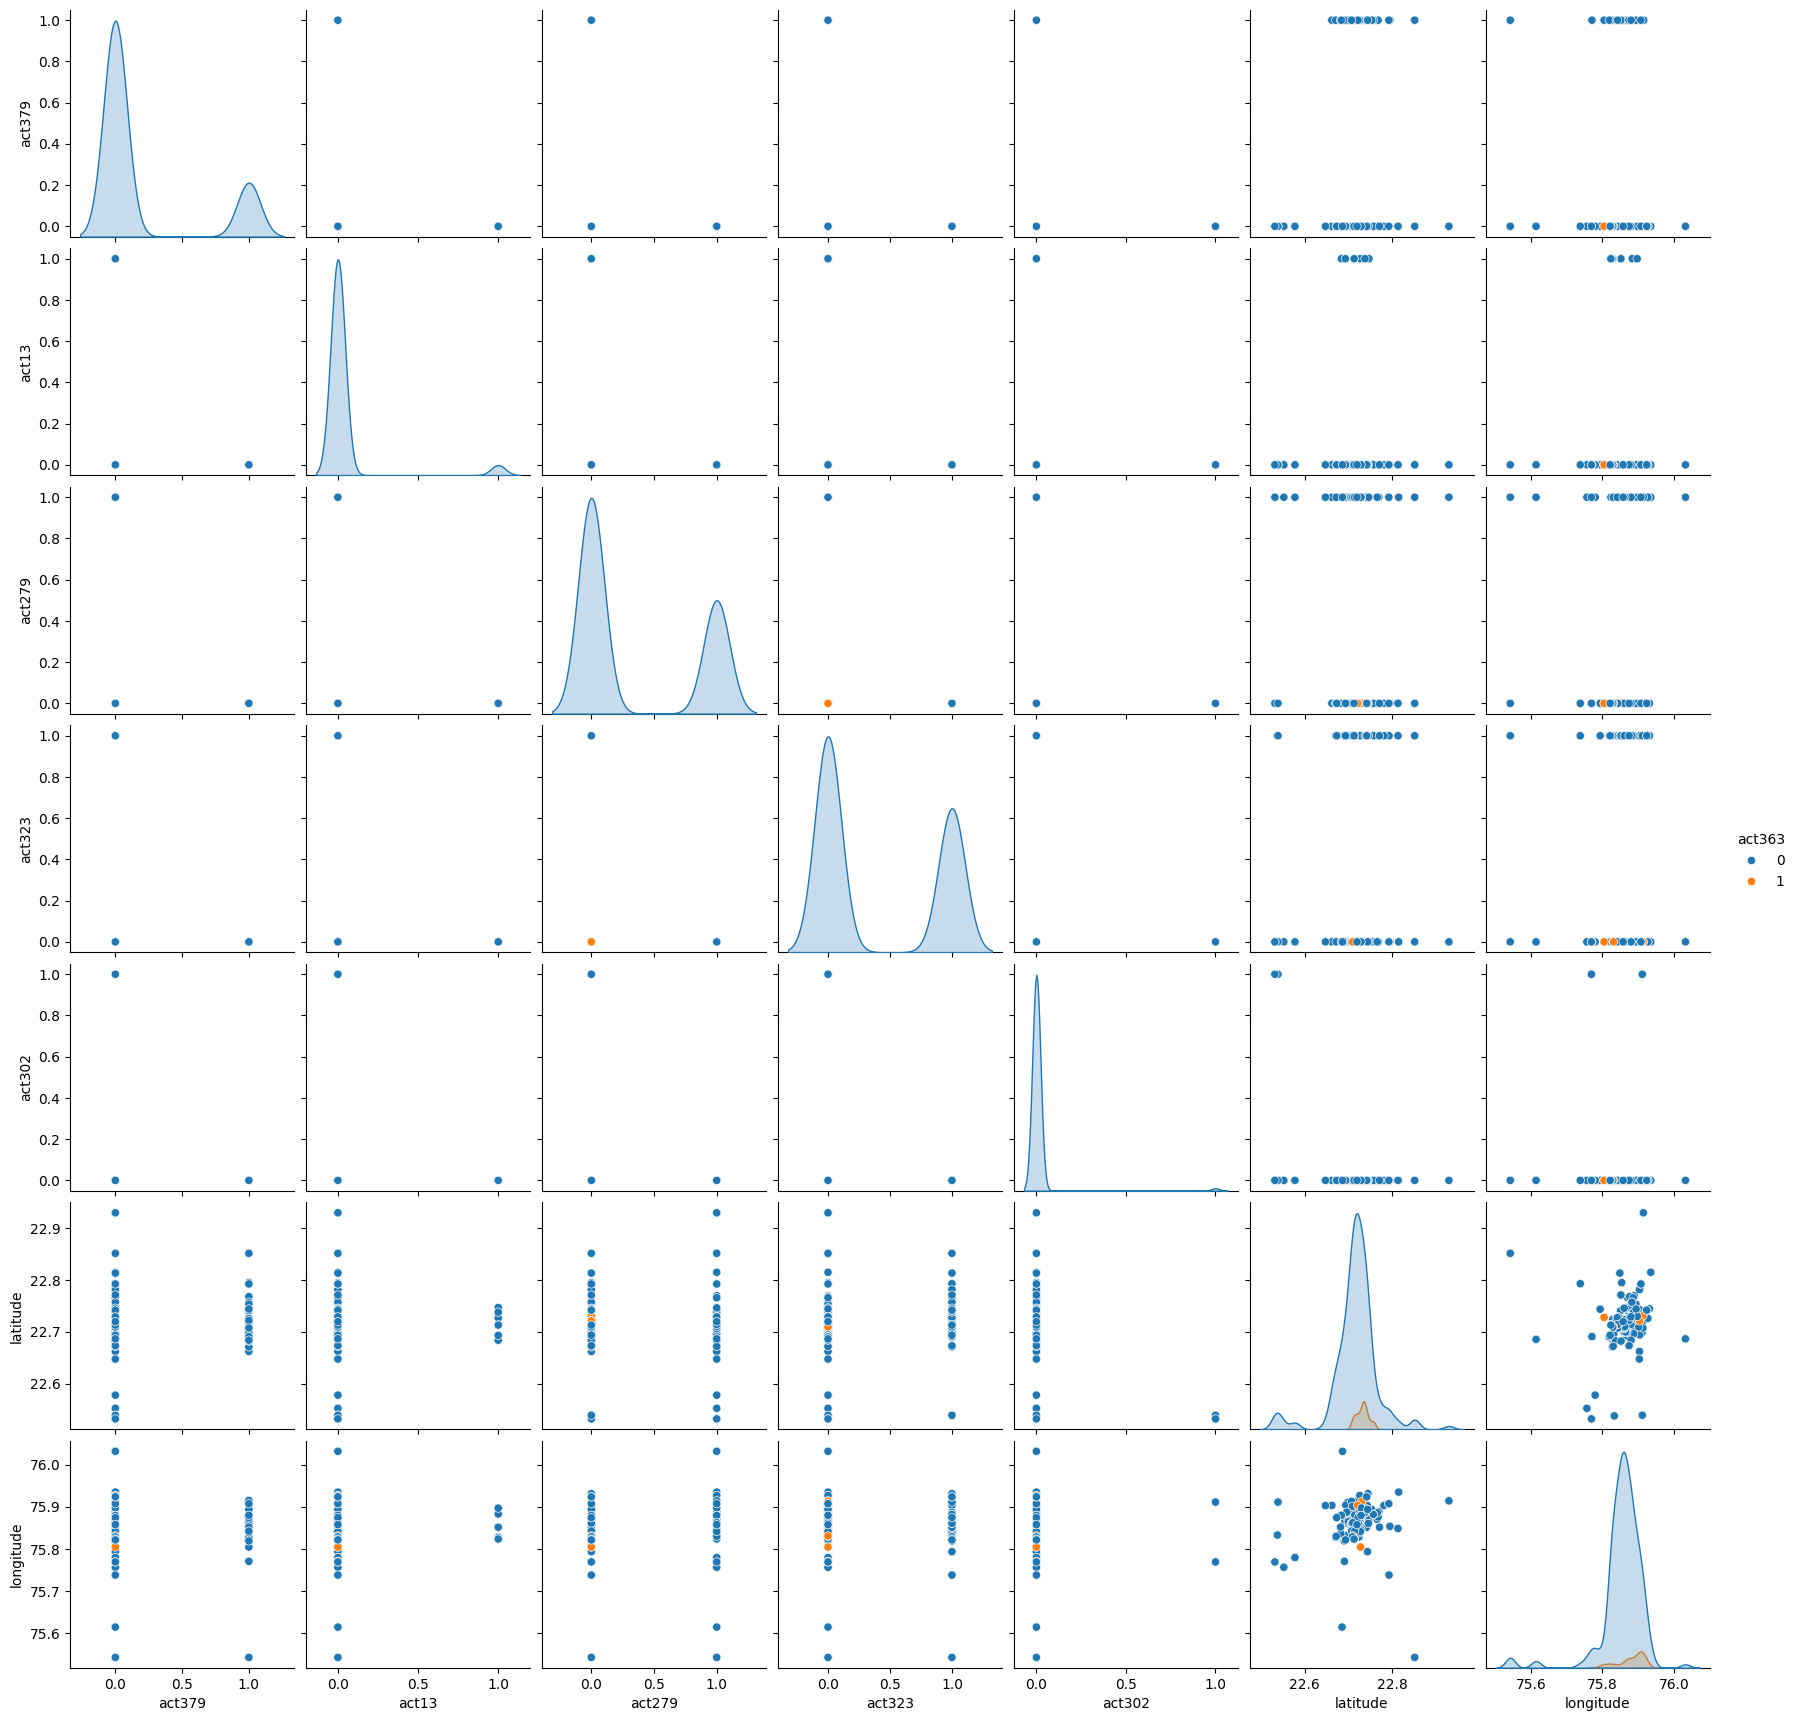

In [36]:
sns.pairplot(dataset,hue='act363')
sns.pairplot(dataset,hue='act279')
sns.pairplot(dataset,hue='act13')
sns.pairplot(dataset,hue='act323')
sns.pairplot(dataset,hue='act363')

In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 1948
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        539 non-null    float64       
 1   month       539 non-null    float64       
 2   day         539 non-null    float64       
 3   hour        539 non-null    float64       
 4   dayofyear   539 non-null    float64       
 5   week        539 non-null    UInt32        
 6   weekofyear  539 non-null    UInt32        
 7   dayofweek   539 non-null    float64       
 8   weekday     539 non-null    float64       
 9   quarter     539 non-null    float64       
 10  timestamp   539 non-null    datetime64[ns]
 11  act379      539 non-null    int64         
 12  act13       539 non-null    int64         
 13  act279      539 non-null    int64         
 14  act323      539 non-null    int64         
 15  act363      539 non-null    int64         
 16  act302      539 non-null    in

In [69]:
data1=data1.drop('timestamp',axis=1)

##DATA PREPROCESSING

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

In [72]:
le.fit(["act379","act279","act323","act302"])

LabelEncoder()

In [73]:
labels = ["act379", "act279", "act323", "act302"]
encoded_labels = le.fit_transform(labels)
decoded_labels = le.inverse_transform([2, 2, 1,])
print(decoded_labels)

['act323' 'act323' 'act302']


##Training and Splitting 

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values

In [76]:
X


array([[2.0, 28.0, 21.0, ..., 9, 22.73726, 75.875987],
       [2.0, 28.0, 21.0, ..., 9, 22.720992, 75.876083],
       [2.0, 28.0, 10.0, ..., 9, 22.736676, 75.883168],
       ...,
       [2.0, 28.0, 17.0, ..., 9, 22.705097, 75.888405],
       [2.0, 28.0, 20.0, ..., 9, 22.692111, 75.867548],
       [2.0, 28.0, 15.0, ..., 9, 22.693141, 75.827293]], dtype=object)

In [77]:
y=data1.iloc[:,[10,11,12,13,14,15]].values

In [78]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

##SPLITTING AND TRAINING

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [80]:
len(X_train)

431

In [81]:

len(X_test)

108

##KNN ALGORITHM

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
knn.score(X_test,y_test)

0.9537037037037037

In [85]:
knn.score(X_train,y_train)

0.9350348027842227

##CREATING DECISION TREE MODEL

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [87]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [88]:
y_pred=dtree.predict(X_test)

In [89]:
dtree.score(X_test,y_test)

0.9537037037037037

In [90]:
dtree.score(X_train,y_train)

0.9350348027842227

In [91]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 